In [1]:
from google.colab import files
uploaded = files.upload()

Saving MSN.csv to MSN.csv


In [2]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("MSN.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"89,000","89,000","89,200","88,200",683.44K,0.11%
1,3/4/2019,"89,500","89,100","91,400","89,000",1.28M,0.56%
2,3/5/2019,"89,400","89,500","90,900","89,300",772.09K,-0.11%
3,3/6/2019,"90,000","90,000","90,200","89,300",695.52K,0.67%
4,3/7/2019,"90,000","90,700","91,000","89,800",947.51K,0.00%
...,...,...,...,...,...,...,...
1310,5/29/2024,"75,000","75,700","76,900","75,000",8.00M,-0.66%
1311,5/30/2024,"77,200","74,300","77,400","74,100",11.16M,2.93%
1312,5/31/2024,"76,600","78,000","78,400","76,600",5.59M,-0.78%
1313,6/3/2024,"77,700","77,300","78,500","76,800",6.57M,1.44%


In [4]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,89000.0,"89,000","89,200","88,200",683.44K,0.11%
1,2019-03-04,89500.0,"89,100","91,400","89,000",1.28M,0.56%
2,2019-03-05,89400.0,"89,500","90,900","89,300",772.09K,-0.11%
3,2019-03-06,90000.0,"90,000","90,200","89,300",695.52K,0.67%
4,2019-03-07,90000.0,"90,700","91,000","89,800",947.51K,0.00%
...,...,...,...,...,...,...,...
1310,2024-05-29,75000.0,"75,700","76,900","75,000",8.00M,-0.66%
1311,2024-05-30,77200.0,"74,300","77,400","74,100",11.16M,2.93%
1312,2024-05-31,76600.0,"78,000","78,400","76,600",5.59M,-0.78%
1313,2024-06-03,77700.0,"77,300","78,500","76,800",6.57M,1.44%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1315 non-null   datetime64[ns]
 1   Price     1315 non-null   float64       
 2   Open      1315 non-null   object        
 3   High      1315 non-null   object        
 4   Low       1315 non-null   object        
 5   Vol.      1315 non-null   object        
 6   Change %  1315 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 72.0+ KB


<h1>Split the data into training, testing, and validation arcording to 7:2:1

In [6]:
# Split the data into training, testing, and validation arcording to 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]


In [7]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.9 MB/s eta 0:00:00


In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16631.011, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16632.346, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16628.372, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16628.251, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16630.350, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16630.221, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16630.182, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16631.357, Time=1.73 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16626.260, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16628.231, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=16628.190, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16626.381, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=16629.363, Time=0.91 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.877 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [10]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331]


In [11]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331]
Predicted closing prices for the next 90 days:
[85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 85584.19935331 85584.19935331 85584.19935331
 85584.19935331 8558

In [12]:
# 7. Tính RMSE, MSE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 16988.00997544252
Testing RMSE: 10976.698038151386
Validation MAE: 16203.138747253297
Testing MAE: 9401.916861919028
Validation MAPE: 24.00830625875116
Testing MAPE: 12.197405261936872


In [13]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

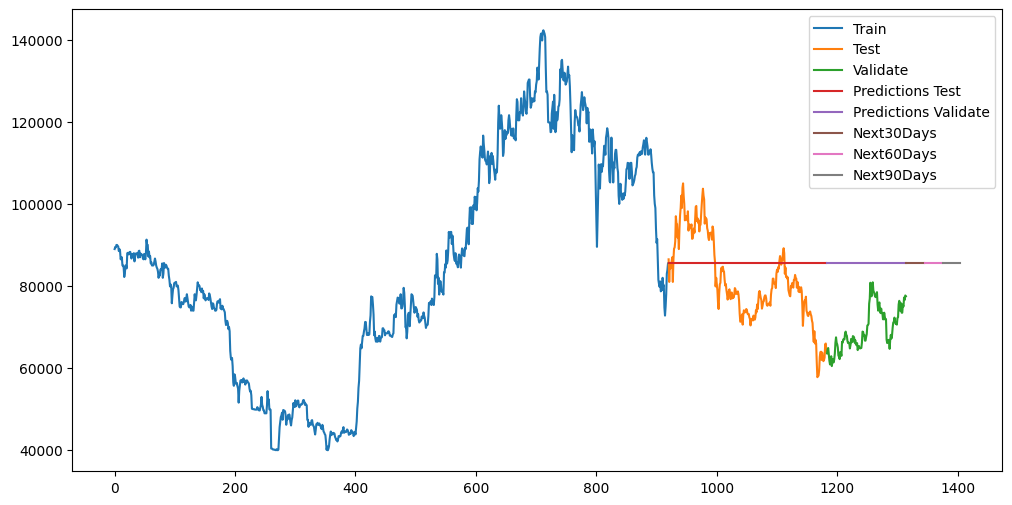

In [14]:
# 8.Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate','Next30Days','Next60Days','Next90Days'])
plt.show()

<h1># Split the data into training, testing, and validation arcording to 6:3:1

In [15]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [16]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14127.287, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14124.861, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14124.856, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14124.810, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14123.107, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14126.716, Time=0.57 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.886 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [17]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [18]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153.
 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153.
 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153.
 115153. 115153. 115153.]


In [19]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153.
 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153.
 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153.
 115153. 115153. 115153.]
Predicted closing prices for the next 90 days:
[115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153.
 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153.
 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153. 115153.
 115153. 115153. 115153.]


In [21]:
# 7. Tính RMSE, MSE, MAPE

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 46055.631724529136
Testing RMSE: 30088.22055847827
Validation MAE: 45771.93939393939
Testing MAE: 26015.1269035533
Validation MAPE: 66.85239329823838
Testing MAPE: 32.97705761118805


In [22]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

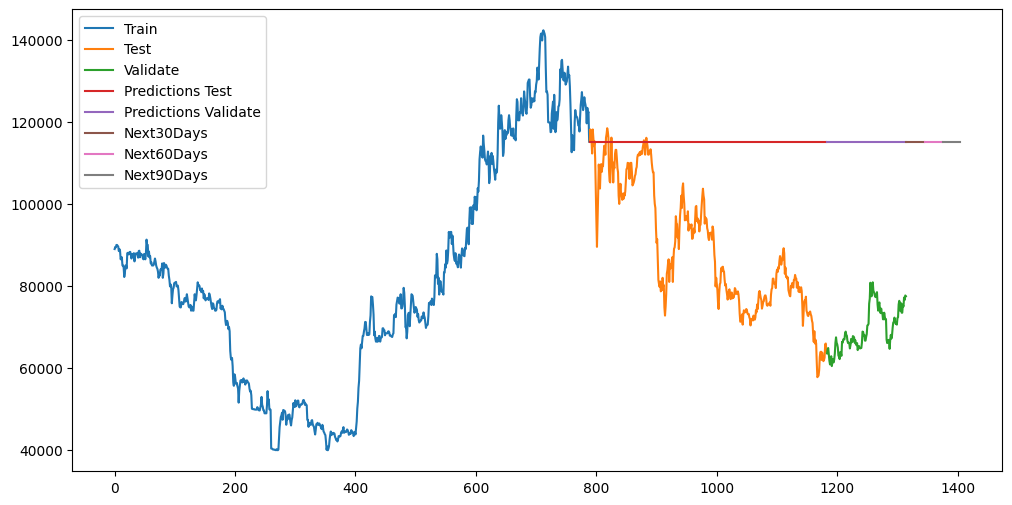

In [23]:
# 8.Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate','Next30Days','Next60Days','Next90Days'])
plt.show()

<h1># Split the data into training, testing, and validation arcording to 5:3:2

In [24]:
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [25]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.96 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=11955.997, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=11907.735, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=11871.223, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=11803.255, Time=0.64 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.75 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=11778.391, Time=0.19 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=1.22 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=inf, Time=1.07 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=inf, Time=2.14 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=11779.911, Time=2.30 sec

Best model:  ARIMA(0,2,3)(0,0,0)[0]          
Total fit time: 9.958 seconds


ARIMA(order=(0, 2, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [26]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [27]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
#last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[119697.80182833 119687.1564793  119965.68788933 120244.21929935
 120522.75070938 120801.28211941 121079.81352943 121358.34493946
 121636.87634948 121915.40775951 122193.93916954 122472.47057956
 122751.00198959 123029.53339962 123308.06480964 123586.59621967
 123865.1276297  124143.65903972 124422.19044975 124700.72185977
 124979.2532698  125257.78467983 125536.31608985 125814.84749988
 126093.37890991 126371.91031993 126650.44172996 126928.97313999
 127207.50455001 127486.03596004]


In [28]:
# Predict the closing prices for the next 60 days
x_next_60_days = model.fit(y_next_30_days)
y_next_60_days = model.predict(n_periods=30)

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Predict the closing prices for the next 60 days
x_next_90_days = model.fit(y_next_60_days)
y_next_90_days =  model.predict(n_periods=30)

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 60 days:
[127764.56737007 128043.09878009 128321.63019012 128600.16160014
 128878.69301017 129157.2244202  129435.75583022 129714.28724025
 129992.81865028 130271.3500603  130549.88147033 130828.41288036
 131106.94429038 131385.47570041 131664.00711043 131942.53852046
 132221.06993049 132499.60134051 132778.13275054 133056.66416057
 133335.19557059 133613.72698062 133892.25839065 134170.78980067
 134449.3212107  134727.85262072 135006.38403075 135284.91544078
 135563.4468508  135841.97826083]
Predicted closing prices for the next 90 days:
[136120.50967086 136399.04108088 136677.57249091 136956.10390094
 137234.63531096 137513.16672099 137791.69813102 138070.22954104
 138348.76095107 138627.29236109 138905.82377112 139184.35518115
 139462.88659117 139741.4180012  140019.94941123 140298.48082125
 140577.01223128 140855.54364131 141134.07505133 141412.60646136
 141691.13787138 141969.66928141 142248.20069144 142526.73210146
 142805.26351149 143083.794

In [29]:
# 7. Tính RMSE, MSE, MAPE

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 87158.96431033786
Testing RMSE: 83643.4467378421
Validation MAE: 83630.54024819481
Testing MAE: 68675.86160292177
Validation MAPE: 118.39346243749067
Testing MAPE: 74.86978382218898


In [30]:
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

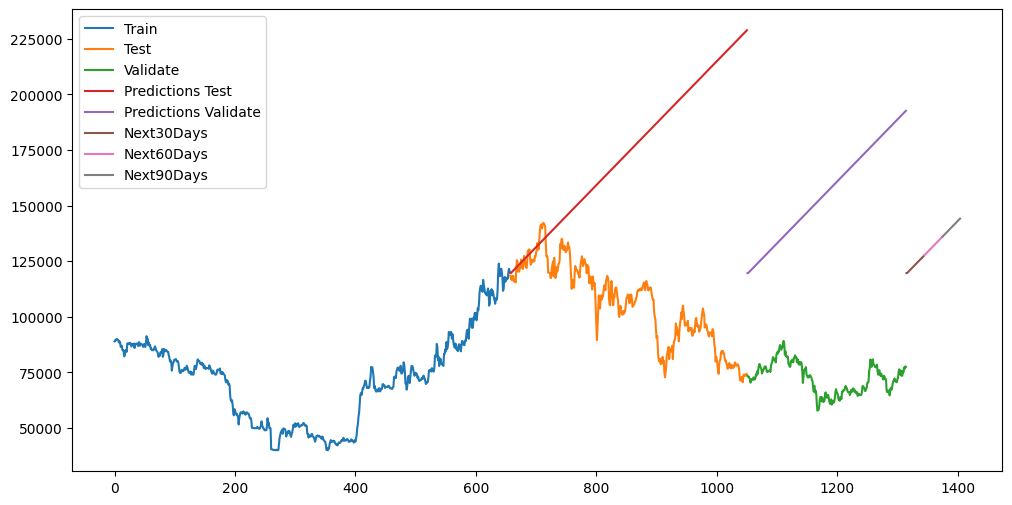

In [31]:
# 8.Vẽ hình
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(index_30_days, y_next_30_days)
plt.plot(index_60_days, y_next_60_days)
plt.plot(index_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate','Next30Days','Next60Days','Next90Days'])
plt.show()